<a href="https://colab.research.google.com/github/Fiona-cherutto/Data-Science-Core/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2020_07_FIONA_CHERUTTO_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

## a) Specifying the Data Analytic Question
The research analyis is to figure out how we can predict which individuals are most likely to have or use a bank account in Kenya, Rwanda, Tanzania, and Uganda.

## b) Defining the Metric for Success
The project will be considered as success when the model can accuretly predict the number of bank users within the three countries Kenya, Rwanda, Tanzania, and that will provide an indication of the state of financial inclusion.

## c) Understanding the context

A bank is a financial institution that accepts deposits from the public and creates a demand deposit while simultaneously making loans. Lending activities can be performed either directly or indirectly through capital markets.



This project aims at successfully predicting catogorical whether anyoneis either a bank user or not. its important theat the model be accurate as it  will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda.Which refers to a process by which individuals and businesses can access appropriate, affordable, and timely financial products and services.

Rural population and income are significant determinants of bank users with rural population being negatively related with banks. This means that the higher the rural population of a country, the less inclusive their bank system is. Unemployment though statistically insignificant had a negative relationship with bank

## d) Recording the Experimental Design

For this analysis will follow the following steps below


1.   Loading and previewing data
2.   Data cleanining
3.   EDA
4.   Implimenting the solution
5.   Challenging the solution
6.   Follow up question







## e) Data Relevance

The data provided for the analysis consist of personal information provided by the bank of its users for a given time span.

# Hypothesis Generation
Hypothesis is a possible view or assertion of an analyst about the problem he or she is working upon. It may be true or may not be true.



1.Are younger customers more likely to have bank accounts ?

2.Are people with bank accounts more likely to be from urban area ?

3.Does a married and Living together have higher chances to have a bank account?

4.familes with high size household more likely to have bank accounts.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')

import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter('ignore')

In [ ]:
#loading dataset
from google.colab import files
files.upload()

!unzip -q prediction_Dataset.zip
!pip install --upgrade seaborn

## 2. Reading the Data

In [ ]:
financial = pd.read_csv('/content/Financial Dataset - 1.csv')
financedecription = pd.read_csv('/content/VariableDefinitions.csv')


## 3. Checking the Data

In [ ]:
financedecription.head(20)

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [ ]:
#priview data
financial.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Previewing the bottom of our dataset
financial.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


Our  financial file contains eleven columns: '23524 rows and 13 columns.  We don't need the descripion for analysis but for refrencing and guidelines.

In [ ]:
# Determining the no. of records in our dataset
print(f'\nfinancial contains {financial.shape[0]} samples and {financial.shape[1]} variables')
print(f'\nfinancedecription contains {financedecription.shape[0]} samples and {financedecription.shape[1]} variables')

features = [c for c in financial.columns if c not in []]
print(f'\nThe dataset contains {len(features)} features')


financial contains 23524 samples and 13 variables

financedecription contains 12 samples and 2 variables

The dataset contains 13 features


In [ ]:
# Checking whether each column has an appropriate datatype
financial.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

# 4. External Data Source Validation



### Validation
the data is valid

## 3. Tidying the Dataset

In [ ]:
#cheacking Anomalies
q1_year = financial['year'].quantile(.25)
q3_year = financial['year'].quantile(.75)

iqr_year = q3_year - q1_year


q1_household_size = financial['household_size'].quantile(.25)
q3_household_size = financial['household_size'].quantile(.75)

iqr_household_size = q3_household_size - q1_household_size

q1_Respondent_Age = financial['Respondent Age'].quantile(.25)
q3_Respondent_Age = financial['Respondent Age'].quantile(.75)

iqr_Respondent_Age = q3_Respondent_Age - q1_Respondent_Age

q1_3, q3_3 = np.percentile(financial['year'], [25, 75]) 

iqr = q3_3 - q1_3

l_bound = q1_year - (1.5*iqr)
u_bound = q3_3 + (1.5 * iqr)

print(iqr_year, iqr)

2.0 2.0


In [ ]:
#cheaking outliers and removing
Q1 = financial.quantile(0.25)
Q3 = financial.quantile(0.75)  
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'financial_out'
# ---
# 
financial_out = financial[~((financial < (Q1 - 1.5 * IQR)) | (financial > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(financial_out.shape)

# Printing the shape of our old dataset
# ---
#
print(financial.shape)

(22903, 13)
(23524, 13)


In [ ]:
# cheaking for the Missing Data
financial.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
# Droppping all 
financial = financial.dropna()
print(financial)

      country  year  ...              Level of Educuation                Type of Job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education              Self employed
23523  Uganda  2018  ...              Secondary education        

In [ ]:
all_cols_any_na = financial.dropna(axis=1)
print(all_cols_any_na)

# Dropping all attributes that have all NA values
# Uncomment the 2 lines below

all_cols_all_na = financial.dropna(axis=1, how="all")
print(all_cols_all_na)

      country  year  ...              Level of Educuation                Type of Job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education              Self employed
23523  Uganda  2018  ...              Secondary education        

In [ ]:
#financial.bfill(axis ='columns') 
#financial.bfill(axis ='row') 

In [ ]:
financial.duplicated().any()

False

In [ ]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  object 
 1   year                    23343 non-null  int64  
 2   uniqueid                23343 non-null  object 
 3   Has a Bank account      23343 non-null  object 
 4   Type of Location        23343 non-null  object 
 5   Cell Phone Access       23343 non-null  object 
 6   household_size          23343 non-null  float64
 7   Respondent Age          23343 non-null  float64
 8   gender_of_respondent    23343 non-null  object 
 9   The relathip with head  23343 non-null  object 
 10  marital_status          23343 non-null  object 
 11  Level of Educuation     23343 non-null  object 
 12  Type of Job             23343 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


In [ ]:
#replacing spaces
financial.columns = financial.columns.str.replace(' ','_')
print (financial)

      country  year  ...              Level_of_Educuation                Type_of_Job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education              Self employed
23523  Uganda  2018  ...              Secondary education        

In [ ]:
# Map the lowering function to all column names

financial.columns = map(str.lower, df.columns)


In [ ]:
financial.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


### Target Distribution
This is a binary classification problem. Lets have a look at the number of of pple with bank and those with nobank accounts 

In [ ]:
financial['Has a Bank account'] = financial['Has a Bank account'].fillna(0)
#df['DataFrame Column'] = df['DataFrame Column'].fillna(0)

In [ ]:
financial['Has a Bank account'].unique()

array(['Yes', 'No', 0], dtype=object)

In [ ]:
financial['Has a Bank account']=financial['Has a Bank account'].replace(['No', 'Yes'],[0 ,1 ])


In [ ]:
financial['Has a Bank account'].value_counts()

0    20215
1     3309
Name: Has a Bank account, dtype: int64

In [ ]:
financial['Has a Bank account'].replace(['No','Yes'],[0 , 1])

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: Has a Bank account, Length: 23524, dtype: int64

In [ ]:
Bank  =  'Has a Bank account'

In [ ]:
financial[Bank].value_counts(normalize=True)

0    0.859335
1    0.140665
Name: Has a Bank account, dtype: float64

Lets visualize the same target distribution in a countplot.

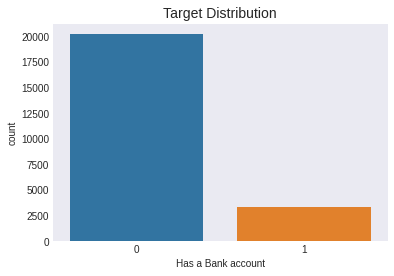

In [ ]:
_ = sns.countplot(financial[Bank])
_ = plt.title("Target Distribution", fontsize=14)

In [ ]:
financial.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [ ]:
financial.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

Segregating Categorical & Numerical Variables

In [ ]:
num_cols =['year', 'household_size','Respondent Age']

In [ ]:
id_cols =['uniqueid']

In [ ]:
#financial['uniqueid']= financial['uniqueid'].replace([])

In [ ]:
cate_cols = [c for c in features if c not in num_cols]
cate_cols

['country',
 'Has a Bank account',
 'Type of Location',
 'Cell Phone Access',
 'gender_of_respondent',
 'The relathip with head',
 'marital_status',
 'Level of Educuation',
 'Type of Job']

# Exploratory Analysis

# Univariate Analysis

## Numerical Features
### 1. Univariate Analysis - Boxplots

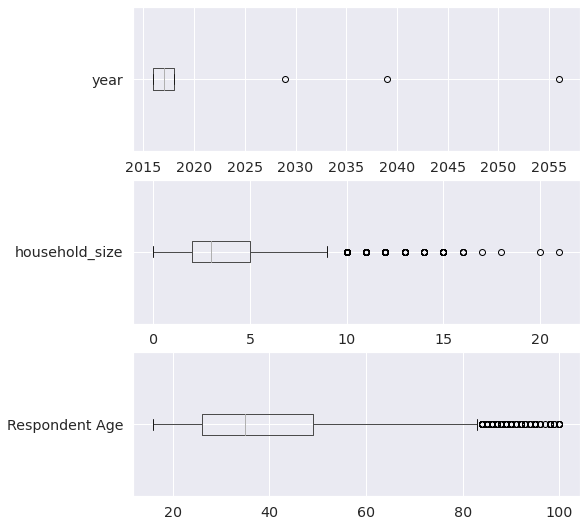

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(8, 9))
for i, c in enumerate(num_cols):
  _ = financial[[c]].boxplot(ax=axes[i], vert=False)



### 2. Univariate Analysis - Density Plots

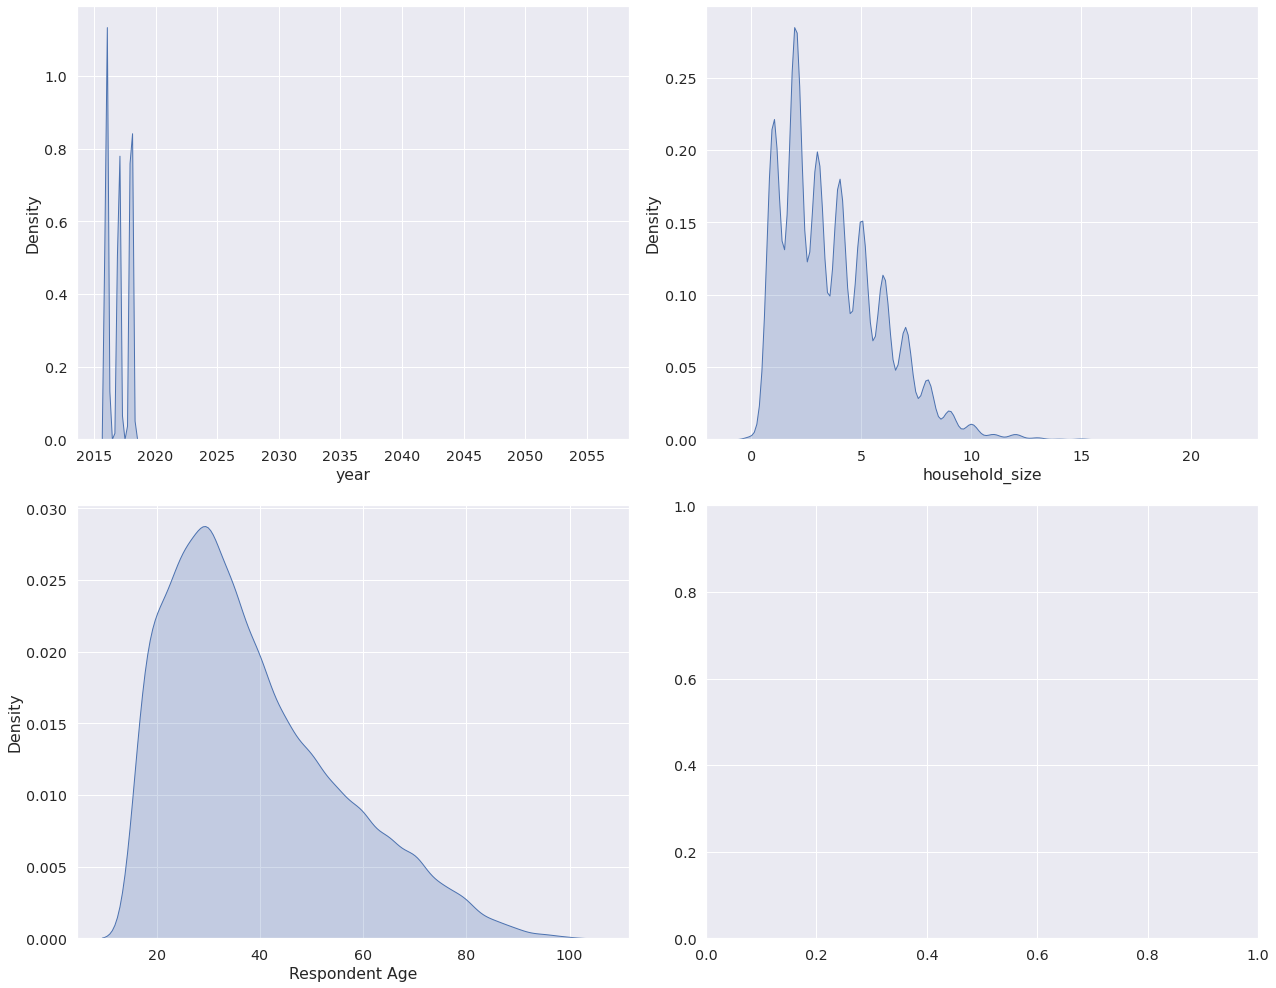

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=financial, x=c, ax=axes[i], fill=True)
plt.tight_layout()

###3. Measures of Central Tendency

In [ ]:
# Finding the mean

financial['household_size'].mean()


3.6818181818181817

In [ ]:
# Finding the mean
financial['Respondent Age'].mean()

38.804299702000854

In [ ]:
# Finding the median
financial["household_size"].median()

3.0

In [ ]:
# Finding the median
financial["Respondent Age"].median()

35.0

In [ ]:
# Finding the median
financial["household_size"].mode()

0    2.0
dtype: float64

In [ ]:
# Finding the median
financial["Respondent Age"].mode()

0    30.0
dtype: float64

### 4. Measures of Dispersion

In [ ]:
# Finding the standard deviation

financial["household_size"].std()

2.279933399631944

In [ ]:
# Finding the min and max values of the householeds average prices
financial_max = financial["household_size"].max()
financial_min = financial["household_size"].min()

# Calculating the range
financial_max - financial_min

21.0

In [ ]:
# Finding the quantiles of the herbicide average prices
financial["household_size"].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [ ]:
# Determining the skeweness
financial["household_size"].skew()

0.977652354434429

In [ ]:
# Determining the Kurtosis 
financial["household_size"].kurt()

1.1581542795310726

In [ ]:
# Example 7: Displaying the summary statistics of the dataframe
#
financial['household_size'].describe()

count    23496.000000
mean         3.681818
std          2.279933
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

### 5. Frequency table

In [ ]:
# Creating our frequency table
# ---
financial.country.value_counts()

Rwanda      8735
Tanzania    6606
Kenya       6068
Uganda      2101
Name: country, dtype: int64

# Categorical Features
### 1. Univariate Analysis - Pie Charts.
Pie Charts can be useful in seeing the proportion of samples, that fall into each category of a categorical variable. For each of the categorical variables we will make a pie chart.

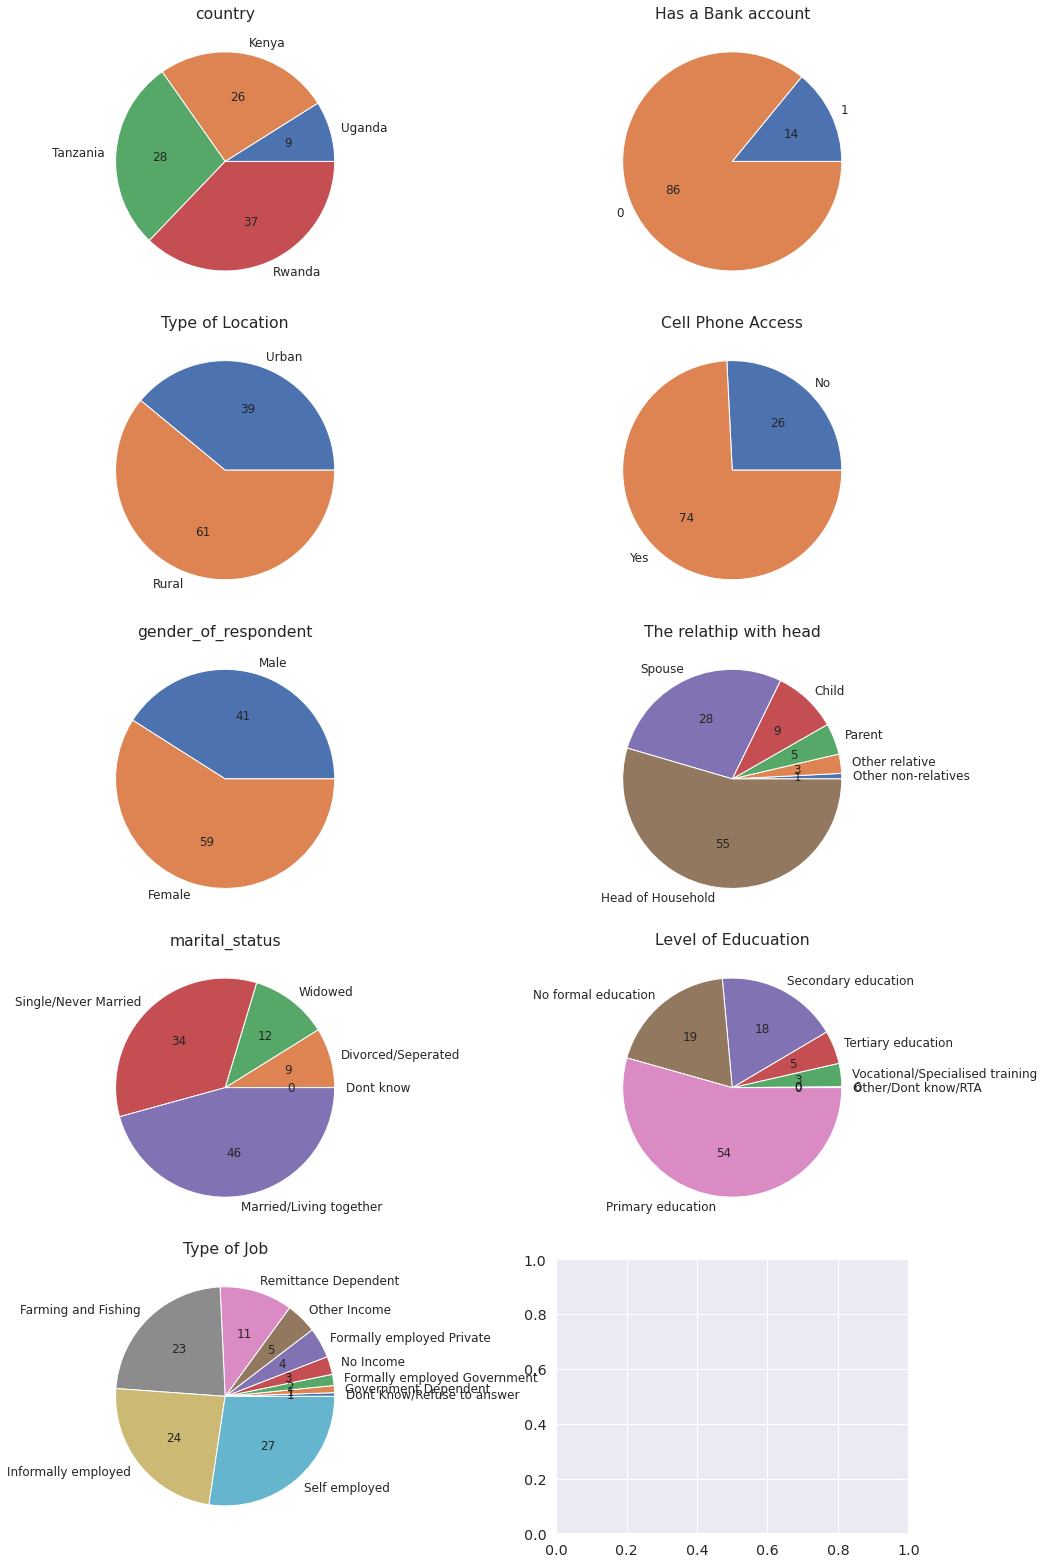

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(14, 22))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(financial[cate_cols]):
    _ = financial[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

### 2. Univariate Analysis - CountPlots.

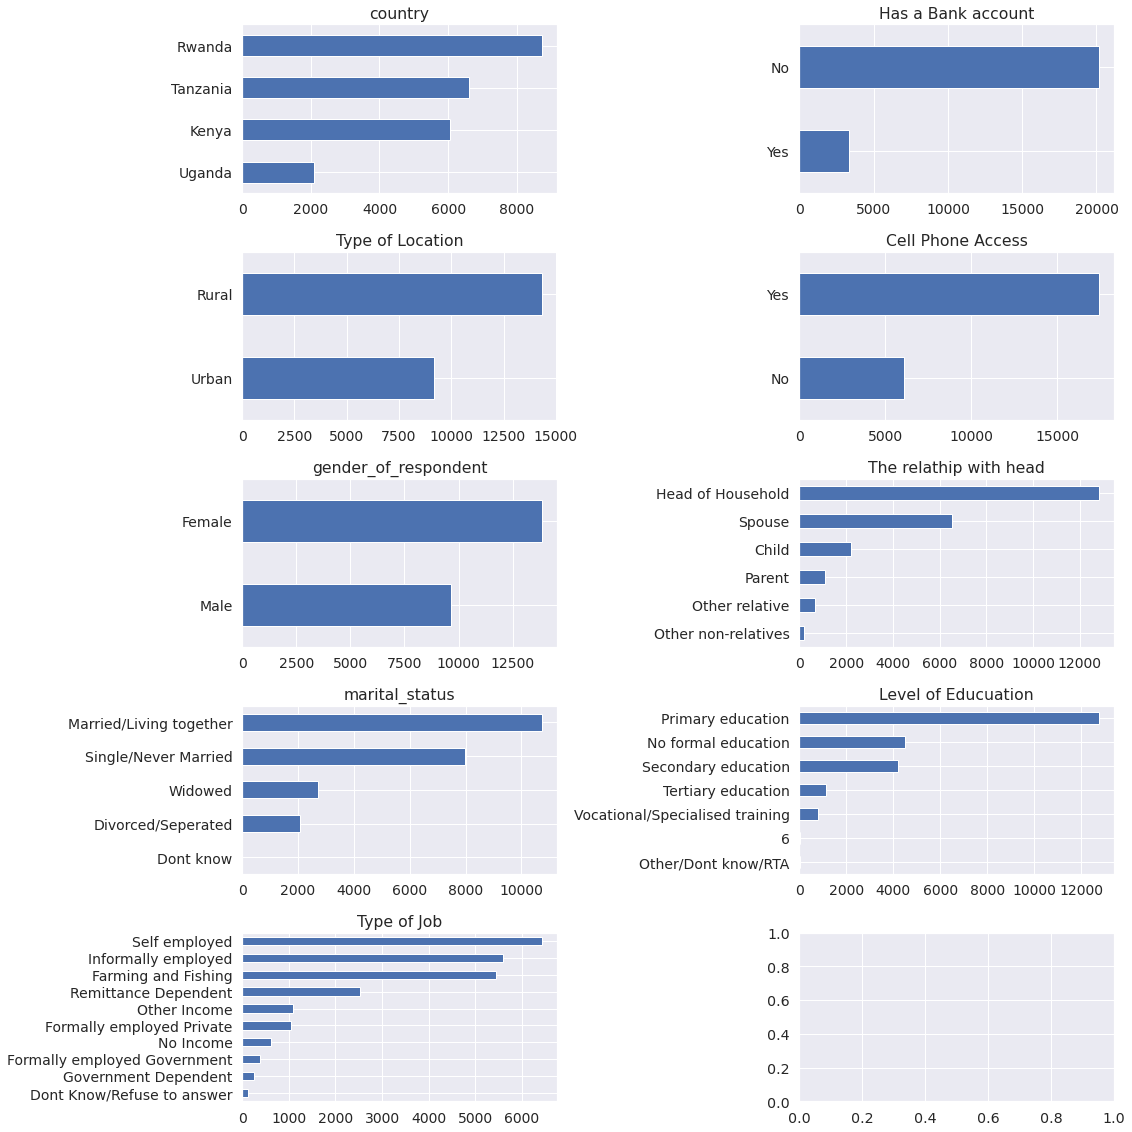

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(16, 16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(financial[cate_cols]):
    _ = financial[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

self employed, marrie/ living together,primary level of education, fimal and have acces to bank acounts

# Bivariate Analysis

## Numerical and Numerical

### 1. Scatter Plots

Text(0.5, 1.0, 'household_size vs Respondent Age')

Text(0.5, 0, 'household_size')

Text(0, 0.5, 'Respondent Age')

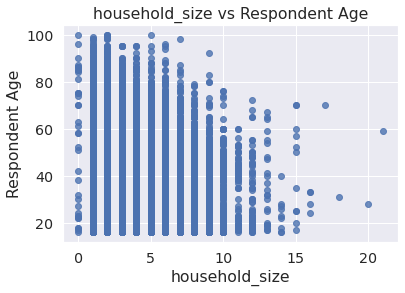

In [ ]:
# Or Using Seaborn: Using the function regplot to create our scatterplot
sns.regplot(x = financial["household_size"], y = financial["Respondent Age"], fit_reg=False)
# Giving our scatterplot a title
plt.title('household_size vs Respondent Age')

# Labelling our x axis
plt.xlabel('household_size')

# Labelling our y axis
plt.ylabel('Respondent Age')

# Displaying our scatterplot
plt.show()


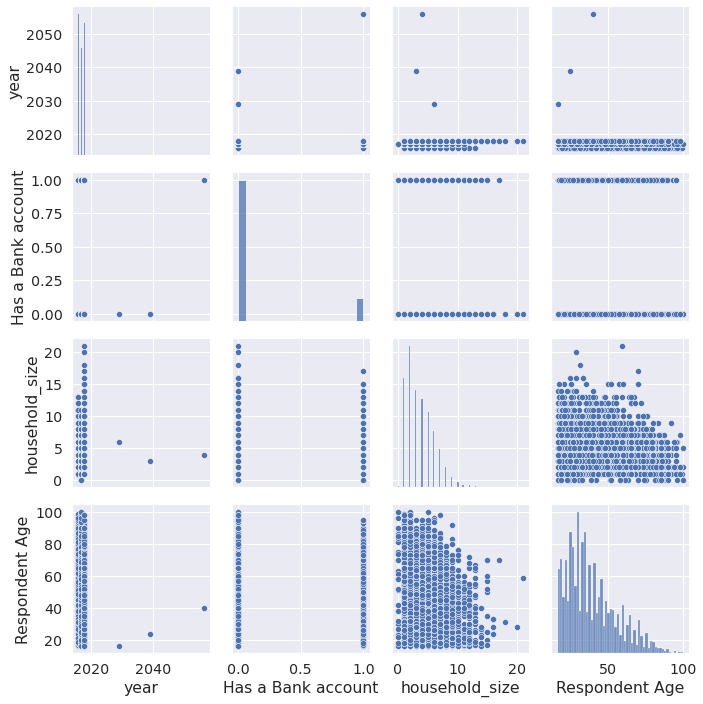

In [ ]:
sns.pairplot(financial)
plt.show()

### 2.Correlation

In [ ]:
# Calculating the pearson coefficient
#
# Checking whether you have to define the pearson
coeff = financial["year"].corr(financial["Respondent Age"]) 
print(coeff)
# weak negative correlation

-0.01956987264962113


In [ ]:
coeff = financial["Has a Bank account"].corr(financial["Respondent Age"]) 
print(coeff)
# Correlation coefficients between -.20 and .20 are generally considered weak,

0.019533821979332344


In [ ]:
coeff = financial["Has a Bank account"].corr(financial["household_size"]) 
print(coeff)
# Correlation coefficients between -.20 and .20 are generally considered weak,

-0.021694346748572308


In [ ]:
financial.corr() 

,year,Has a Bank account,household_size,Respondent Age
year,1.000000,0.109607,-0.049344,-0.019570
Has a Bank account,0.109607,1.000000,-0.021694,0.019534
household_size,-0.049344,-0.021694,1.000000,-0.119709
Respondent Age,-0.019570,0.019534,-0.119709,1.000000


correration of financial to the bank is weak correlation of both negative and positive

In [ ]:
#financial[['year','Respondent Age']].plot(kind='bar', figsize=(8, 6), stacked=True)

## Categorical and Categorical

### 1. Stacked Column Chart

(array([    0,     1,     2, ..., 23521, 23522, 23523]),
 <a list of 23524 Text major ticklabel objects>)

Text(0.5, 1.015, 'Has a Bank account, household_size, Respondent Age')

Text(0, 0.5, 'year')

Text(0.5, 0, 'household_size')

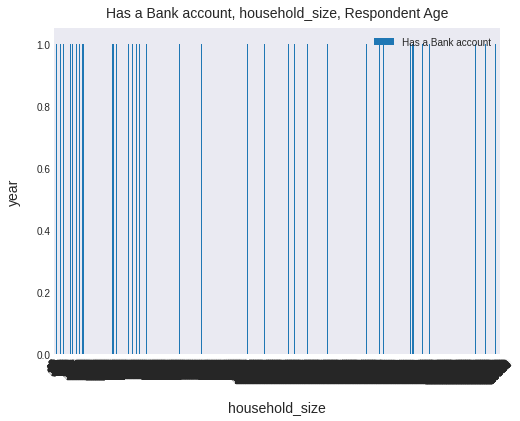

In [ ]:
financial[['Has a Bank account','Level of Educuation']].plot(kind='bar', figsize=(8, 6), stacked=True)
# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("Has a Bank account, household_size, Respondent Age" , fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("year", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("household_size", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

## Categorical and Numerical
### 1. Line Charts

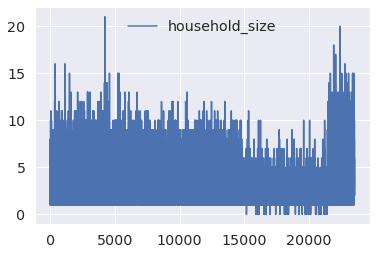

In [ ]:
# Plotting our line graph
financial[["household_size"]].plot()

Z-test

In [ ]:
from scipy import stats
financial['Has a Bank account']

stats.zscore('Has a Bank account')

In [ ]:
from scipy import stats
# Step 1: 
# Taking a look at our data
# ---
financial[['household_size','Respondent Age']].describe()

# Step 2:
# Checking for any significant outliers in each of the variables
# ---
financial[['year','household_size',	'Respondent Age']].plot(kind='box')


# ---
stats.probplot(financial['year','household_size','Respondent Age'], plot= plt)
plt.title('Difference Q-Q Plot')


# ---
stats.shapiro(financial['household_size','Respondent_Age'])


stats.ttest_rel(financial['year'], financial['household_size','Respondent_Age'])



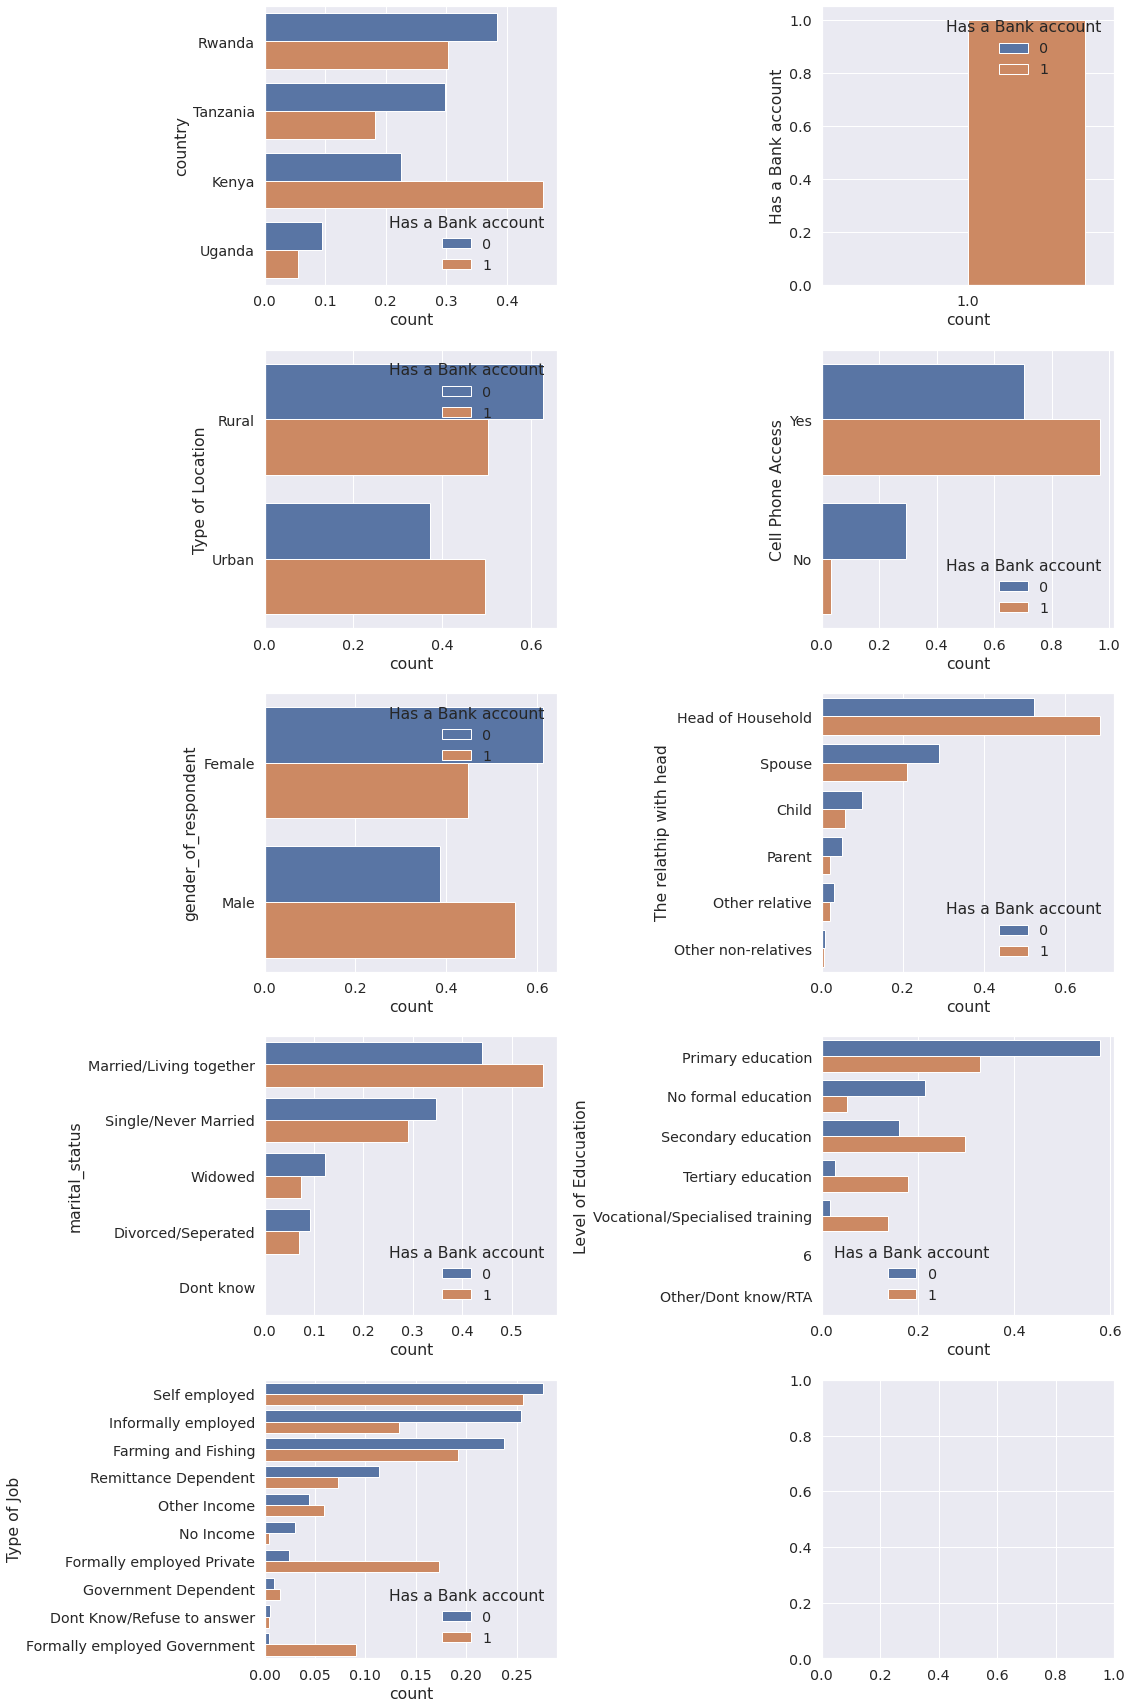

In [ ]:
# bar plot relation w of each colum with bank
fig, axes = plt.subplots(5, 2, figsize=(16, 24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(financial[cate_cols]):
    fltr = financial[Bank] == 0

    vc_a = financial[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)
    vc_b = financial[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_a[Bank] = 0
    vc_b[Bank] = 1

    df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

    _ = sns.barplot(y = c, x = 'count', data =df , hue=Bank, ax=axes[i])
    
_ = plt.tight_layout()

male have a high percentage of bank account than female both urban rural and with access to cel phone use banks

<Figure size 1008x576 with 0 Axes>

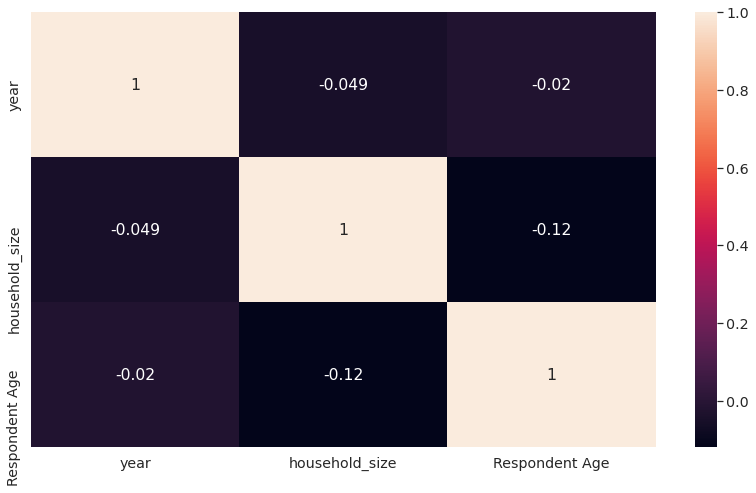

In [ ]:
# heaat map of the numerical column year,household size age
plt.figure(figsize=(14, 8))
_ = sns.heatmap(financial[num_cols].corr(), annot=True)

<Figure size 1008x576 with 0 Axes>

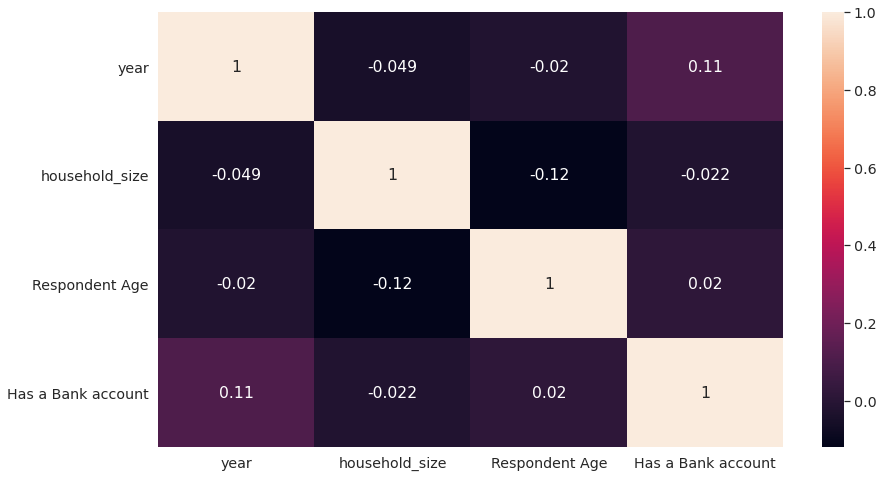

In [ ]:
#heat map with bank users
plt.figure(figsize=(14, 8))
_ = sns.heatmap(financial[num_cols + ['Has a Bank account']].corr(), annot=True)

Bivariate Analysis KDE plots - Relationships with Target Variable the bank access.

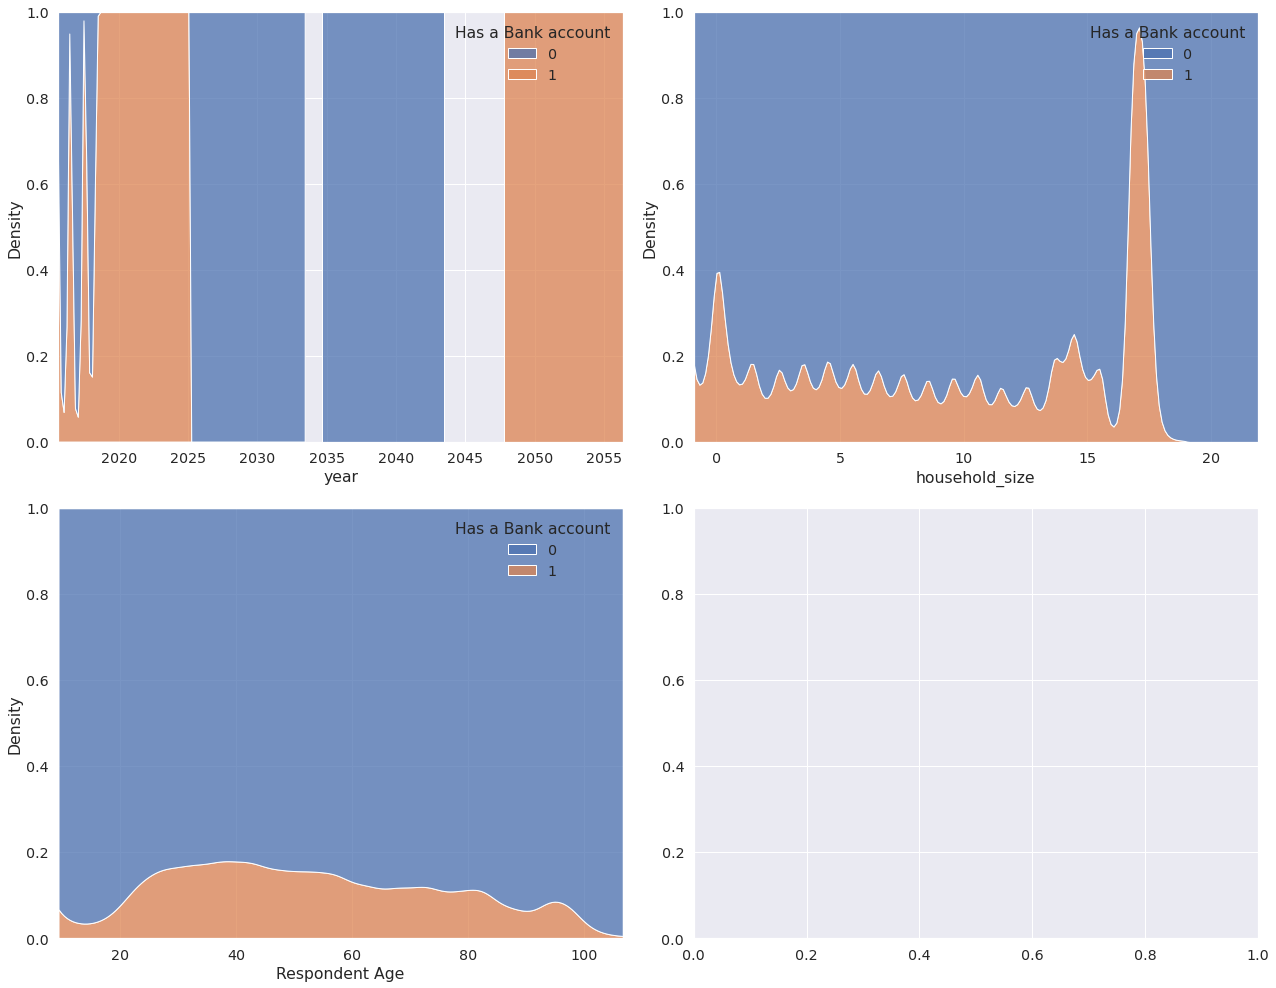

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=financial, x=c, hue=Bank, multiple='fill', ax=axes[i])
plt.tight_layout()

the yaer 2025 to 2045 have acces

Bivariate Analysis - Horizontal BarPlots

For each numerical Variable. We will plot the median of the numerical variable for:

Has no bank account == 0

Has a bank account == 1

We are choosing median since median is not affected by outliers, and our data has a lot of outlers

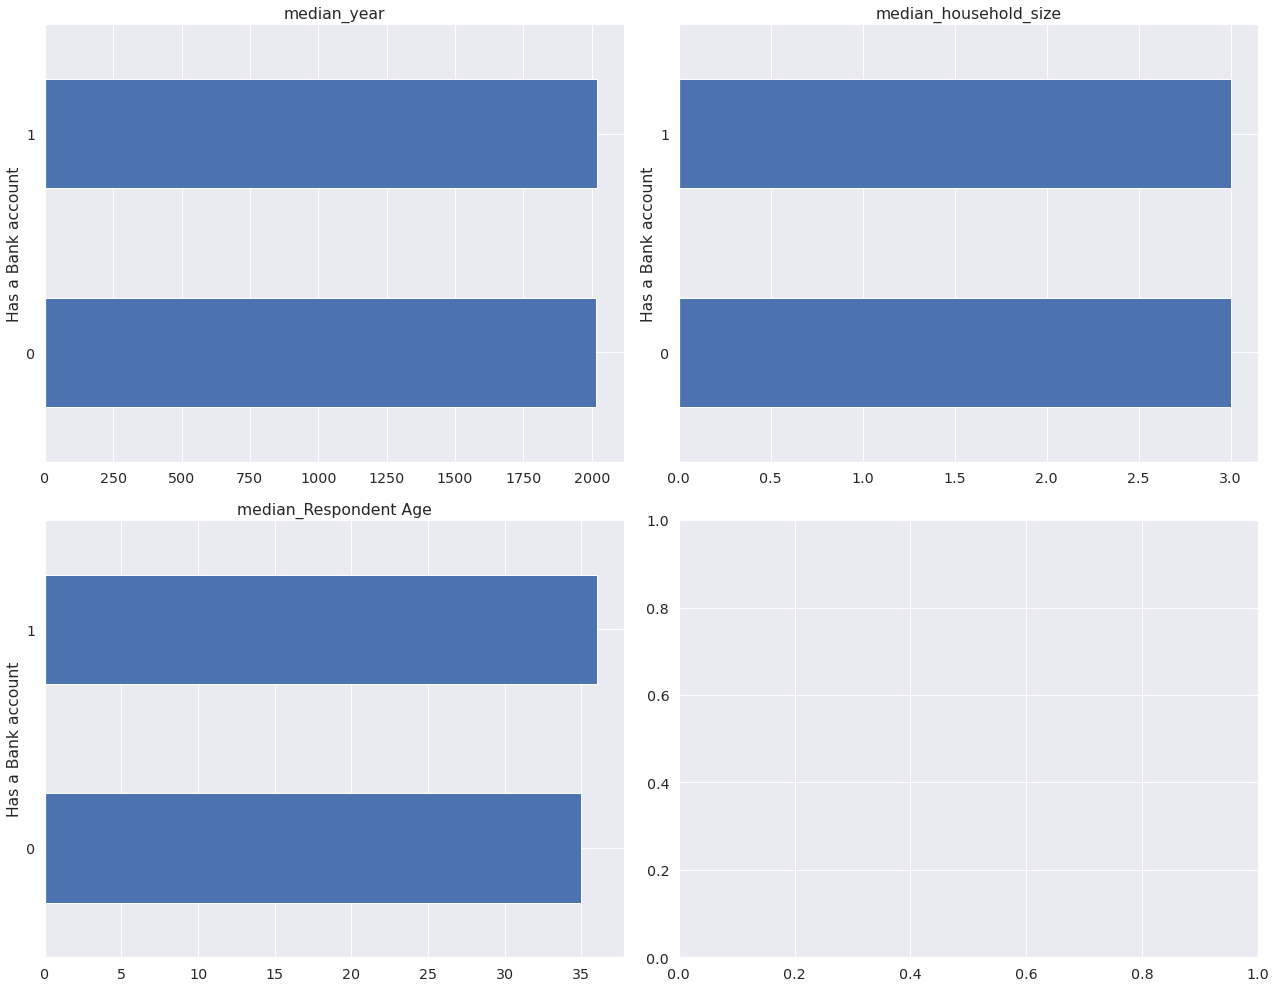

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = financial.groupby(Bank)[c].median().plot(kind = 'barh', title=f'median_{c}', ax=axes[i])
plt.tight_layout()

Q. Do people with a living in rural  more likely to have accounts ?

Q. Do old people have more chances of having bank?

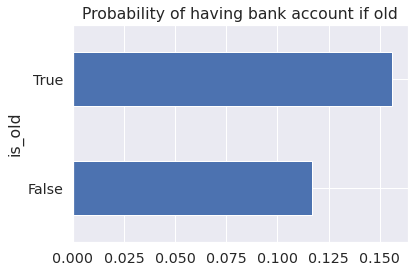

In [ ]:

financial['is_old'] = True
financial.loc[financial['Respondent Age'] <= 30, 'is_old'] = False

_ = financial.groupby('is_old')[Bank].mean().sort_values().plot(kind = 'barh', title='Probability of having bank account if old')

true old people are more to thave bank account thank younger age

Q. Do married people have more chances of having bank?

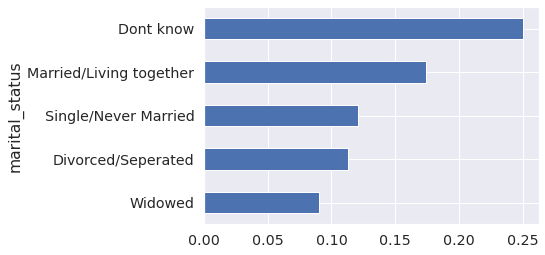

In [ ]:
_ = financial.groupby('marital_status')[Bank].mean().sort_values().plot(kind = 'barh')

Customers with dont kow marital status are more likey to have accounts

Q, Do  people living in urban have more chances of having a bank

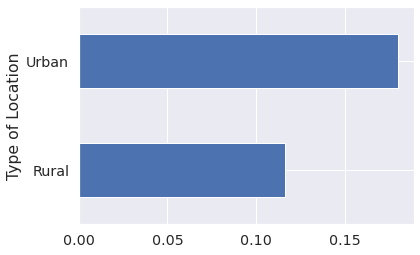

In [ ]:
_ = financial.groupby('Type of Location')[Bank].mean().sort_values().plot(kind = 'barh')

Urban  ares are more highly and have bank accounts

Q, Do  people learned have more chances of having a bank

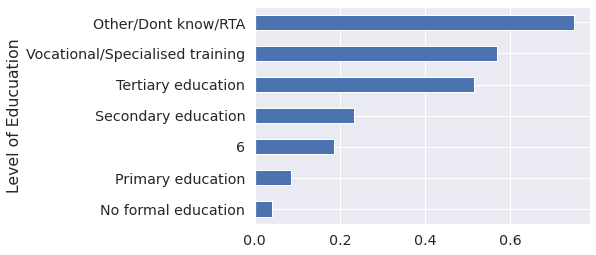

In [ ]:
_ = financial.groupby('Level of Educuation')[Bank].mean().sort_values().plot(kind = 'barh')

No formal education have little chance of ahaving account withother/dont know/rta are more likely to be users of bank

Q, Do  people with goverment employment have more chances of having a bank

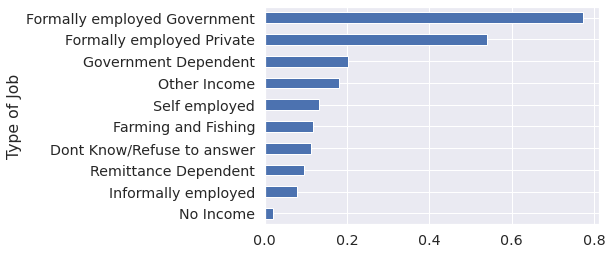

In [ ]:
_ = financial.groupby('Type of Job')[Bank].mean().sort_values().plot(kind = 'barh')

Goverment employees have high chance to have banks

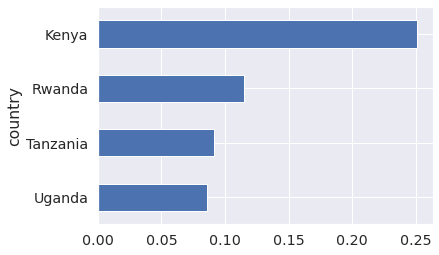

In [ ]:
_ = financial.groupby('country')[Bank].mean().sort_values().plot(kind = 'barh')

kenya have a higher chance to having accounts

# Multivariate Analysis



## 1.Principal Component Analysis

In [ ]:
financial.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
financial = financial.dropna()
print(financial)


      country  year  ...              Level of Educuation                Type of Job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education              Self employed
23523  Uganda  2018  ...              Secondary education        

In [ ]:
#cheaking missind
financial.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [ ]:
df1_dc =pd.get_dummies(financial).head()
df1_dc.head()

,year,Has a Bank account,household_size,Respondent Age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,uniqueid_uniqueid_1,uniqueid_uniqueid_10,uniqueid_uniqueid_100,uniqueid_uniqueid_1000,uniqueid_uniqueid_1001,uniqueid_uniqueid_1002,uniqueid_uniqueid_1003,uniqueid_uniqueid_1004,uniqueid_uniqueid_1005,uniqueid_uniqueid_1006,uniqueid_uniqueid_1007,uniqueid_uniqueid_1008,uniqueid_uniqueid_1009,uniqueid_uniqueid_101,uniqueid_uniqueid_1010,uniqueid_uniqueid_1011,uniqueid_uniqueid_1012,uniqueid_uniqueid_1013,uniqueid_uniqueid_1014,uniqueid_uniqueid_1015,uniqueid_uniqueid_1016,uniqueid_uniqueid_1017,uniqueid_uniqueid_1018,uniqueid_uniqueid_1019,uniqueid_uniqueid_102,uniqueid_uniqueid_1020,uniqueid_uniqueid_1021,uniqueid_uniqueid_1022,uniqueid_uniqueid_1023,uniqueid_uniqueid_1024,uniqueid_uniqueid_1025,uniqueid_uniqueid_1026,...,uniqueid_uniqueid_994,uniqueid_uniqueid_995,uniqueid_uniqueid_996,uniqueid_uniqueid_997,uniqueid_uniqueid_998,uniqueid_uniqueid_999,Type of Location_Rural,Type of Location_Urban,Cell Phone Access_No,Cell Phone Access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,The relathip with head_Child,The relathip with head_Head of Household,The relathip with head_Other non-relatives,The relathip with head_Other relative,The relathip with head_Parent,The relathip with head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,Level of Educuation_6,Level of Educuation_No formal education,Level of Educuation_Other/Dont know/RTA,Level of Educuation_Primary education,Level of Educuation_Secondary education,Level of Educuation_Tertiary education,Level of Educuation_Vocational/Specialised training,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
0,2018,1,3.0,24.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,0,5.0,70.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,1,5.0,26.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,0,5.0,34.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,0,8.0,26.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df0 = financial.drop(columns=['uniqueid'])
df0

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,1,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,0,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,0,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,0,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,0,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [ ]:
dfq_dc= pd.get_dummies(df0, columns =['Has a Bank account',	'Type of Location',	'Cell Phone Access',	'household_size',	'Respondent Age','gender_of_respondent','The relathip with head',	'marital_status',	'Level of Educuation',	'Type of Job'])
dfq_dc.head()

,country,year,Has a Bank account_0,Has a Bank account_1,Type of Location_Rural,Type of Location_Urban,Cell Phone Access_No,Cell Phone Access_Yes,household_size_0.0,household_size_1.0,household_size_2.0,household_size_3.0,household_size_4.0,household_size_5.0,household_size_6.0,household_size_7.0,household_size_8.0,household_size_9.0,household_size_10.0,household_size_11.0,household_size_12.0,household_size_13.0,household_size_14.0,household_size_15.0,household_size_16.0,household_size_17.0,household_size_18.0,household_size_20.0,household_size_21.0,Respondent Age_16.0,Respondent Age_17.0,Respondent Age_18.0,Respondent Age_19.0,Respondent Age_20.0,Respondent Age_21.0,Respondent Age_22.0,Respondent Age_23.0,Respondent Age_24.0,Respondent Age_25.0,Respondent Age_26.0,...,Respondent Age_91.0,Respondent Age_92.0,Respondent Age_93.0,Respondent Age_94.0,Respondent Age_95.0,Respondent Age_96.0,Respondent Age_97.0,Respondent Age_98.0,Respondent Age_99.0,Respondent Age_100.0,gender_of_respondent_Female,gender_of_respondent_Male,The relathip with head_Child,The relathip with head_Head of Household,The relathip with head_Other non-relatives,The relathip with head_Other relative,The relathip with head_Parent,The relathip with head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,Level of Educuation_6,Level of Educuation_No formal education,Level of Educuation_Other/Dont know/RTA,Level of Educuation_Primary education,Level of Educuation_Secondary education,Level of Educuation_Tertiary education,Level of Educuation_Vocational/Specialised training,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
0,Kenya,2018,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Kenya,2018,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,Kenya,2018,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Kenya,2018,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df4= dfq_dc.drop(columns=['year'])
df4



,country,Has a Bank account_0,Has a Bank account_1,Type of Location_Rural,Type of Location_Urban,Cell Phone Access_No,Cell Phone Access_Yes,household_size_0.0,household_size_1.0,household_size_2.0,household_size_3.0,household_size_4.0,household_size_5.0,household_size_6.0,household_size_7.0,household_size_8.0,household_size_9.0,household_size_10.0,household_size_11.0,household_size_12.0,household_size_13.0,household_size_14.0,household_size_15.0,household_size_16.0,household_size_17.0,household_size_18.0,household_size_20.0,household_size_21.0,Respondent Age_16.0,Respondent Age_17.0,Respondent Age_18.0,Respondent Age_19.0,Respondent Age_20.0,Respondent Age_21.0,Respondent Age_22.0,Respondent Age_23.0,Respondent Age_24.0,Respondent Age_25.0,Respondent Age_26.0,Respondent Age_27.0,...,Respondent Age_91.0,Respondent Age_92.0,Respondent Age_93.0,Respondent Age_94.0,Respondent Age_95.0,Respondent Age_96.0,Respondent Age_97.0,Respondent Age_98.0,Respondent Age_99.0,Respondent Age_100.0,gender_of_respondent_Female,gender_of_respondent_Male,The relathip with head_Child,The relathip with head_Head of Household,The relathip with head_Other non-relatives,The relathip with head_Other relative,The relathip with head_Parent,The relathip with head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,Level of Educuation_6,Level of Educuation_No formal education,Level of Educuation_Other/Dont know/RTA,Level of Educuation_Primary education,Level of Educuation_Secondary education,Level of Educuation_Tertiary education,Level of Educuation_Vocational/Specialised training,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
0,Kenya,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,Kenya,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Kenya,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,Kenya,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Kenya,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23520,Uganda,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
23521,Uganda,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
23522,Uganda,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_dc= pd.get_dummies(financial, columns=['Has a Bank account',
 'Type of Location',
 'Cell Phone Access',
 'gender_of_respondent',
 'The relathip with head',
 'marital_status',
 'Level of Educuation',
 'Type of Job'])
df_dc.head()
df_dc.drop('year','uniqueid')

,country,year,uniqueid,household_size,Respondent Age,Has a Bank account_0,Has a Bank account_1,Type of Location_Rural,Type of Location_Urban,Cell Phone Access_No,Cell Phone Access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,The relathip with head_Child,The relathip with head_Head of Household,The relathip with head_Other non-relatives,The relathip with head_Other relative,The relathip with head_Parent,The relathip with head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,Level of Educuation_6,Level of Educuation_No formal education,Level of Educuation_Other/Dont know/RTA,Level of Educuation_Primary education,Level of Educuation_Secondary education,Level of Educuation_Tertiary education,Level of Educuation_Vocational/Specialised training,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
0,Kenya,2018,uniqueid_1,3.0,24.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,uniqueid_2,5.0,70.0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Kenya,2018,uniqueid_3,5.0,26.0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,Kenya,2018,uniqueid_4,5.0,34.0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Kenya,2018,uniqueid_5,8.0,26.0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
dfc =df_dc.drop(columns=['year', 'uniqueid'])
dfc

,country,household_size,Respondent Age,Has a Bank account_0,Has a Bank account_1,Type of Location_Rural,Type of Location_Urban,Cell Phone Access_No,Cell Phone Access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,The relathip with head_Child,The relathip with head_Head of Household,The relathip with head_Other non-relatives,The relathip with head_Other relative,The relathip with head_Parent,The relathip with head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,Level of Educuation_6,Level of Educuation_No formal education,Level of Educuation_Other/Dont know/RTA,Level of Educuation_Primary education,Level of Educuation_Secondary education,Level of Educuation_Tertiary education,Level of Educuation_Vocational/Specialised training,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
0,Kenya,3.0,24.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,Kenya,5.0,70.0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Kenya,5.0,26.0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,Kenya,5.0,34.0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Kenya,8.0,26.0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,4.0,48.0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23520,Uganda,2.0,27.0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
23521,Uganda,5.0,27.0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
23522,Uganda,7.0,30.0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
dfq_dc.head()

X = dfq_dc.drop('country', 1)
y = dfq_dc['country']

In [ ]:
#drop the missing 
dfc_no_missing = dfc.dropna()
dfc_no_missing
# Drop rows where all cells in that row is NA
dfc_cleaned = dfc.dropna(how='all')
dfc_cleaned

In [ ]:
#PCA analysis
df4.head()

X = df4.drop('country', 1)
y = df4['country']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#normolization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

#Using 1 Principal Component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

#Results with 0 Principal Components
from sklearn.decomposition import PCA

pca = PCA(n_components=0)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Results with  Principal Components

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# With three principal components the classification accuracy 
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

,country,Has a Bank account_0,Has a Bank account_1,Type of Location_Rural,Type of Location_Urban,Cell Phone Access_No,Cell Phone Access_Yes,household_size_0.0,household_size_1.0,household_size_2.0,household_size_3.0,household_size_4.0,household_size_5.0,household_size_6.0,household_size_7.0,household_size_8.0,household_size_9.0,household_size_10.0,household_size_11.0,household_size_12.0,household_size_13.0,household_size_14.0,household_size_15.0,household_size_16.0,household_size_17.0,household_size_18.0,household_size_20.0,household_size_21.0,Respondent Age_16.0,Respondent Age_17.0,Respondent Age_18.0,Respondent Age_19.0,Respondent Age_20.0,Respondent Age_21.0,Respondent Age_22.0,Respondent Age_23.0,Respondent Age_24.0,Respondent Age_25.0,Respondent Age_26.0,Respondent Age_27.0,...,Respondent Age_91.0,Respondent Age_92.0,Respondent Age_93.0,Respondent Age_94.0,Respondent Age_95.0,Respondent Age_96.0,Respondent Age_97.0,Respondent Age_98.0,Respondent Age_99.0,Respondent Age_100.0,gender_of_respondent_Female,gender_of_respondent_Male,The relathip with head_Child,The relathip with head_Head of Household,The relathip with head_Other non-relatives,The relathip with head_Other relative,The relathip with head_Parent,The relathip with head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,Level of Educuation_6,Level of Educuation_No formal education,Level of Educuation_Other/Dont know/RTA,Level of Educuation_Primary education,Level of Educuation_Secondary education,Level of Educuation_Tertiary education,Level of Educuation_Vocational/Specialised training,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
0,Kenya,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,Kenya,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Kenya,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,Kenya,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Kenya,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


array([2.45075366e-02, 2.38756961e-02, 2.06757087e-02, 1.76703076e-02,
       1.60679904e-02, 1.16212415e-02, 1.11839544e-02, 1.01400409e-02,
       9.87950687e-03, 9.35168787e-03, 8.94936702e-03, 8.71269012e-03,
       8.56110266e-03, 8.42647945e-03, 8.31297666e-03, 8.25694620e-03,
       8.13844901e-03, 8.08487266e-03, 7.98165200e-03, 7.90181822e-03,
       7.84699836e-03, 7.82942589e-03, 7.76944113e-03, 7.72679985e-03,
       7.71081401e-03, 7.69857198e-03, 7.67029669e-03, 7.65140836e-03,
       7.62030419e-03, 7.58165800e-03, 7.57277832e-03, 7.53546351e-03,
       7.51612501e-03, 7.49536503e-03, 7.47034803e-03, 7.44867191e-03,
       7.42091926e-03, 7.38851815e-03, 7.38224478e-03, 7.35680974e-03,
       7.34471671e-03, 7.31782164e-03, 7.30114271e-03, 7.29600522e-03,
       7.27621138e-03, 7.26711806e-03, 7.25486508e-03, 7.25301010e-03,
       7.24738734e-03, 7.23659513e-03, 7.23123516e-03, 7.22753538e-03,
       7.21497385e-03, 7.21205371e-03, 7.20905219e-03, 7.19906585e-03,
      

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

[[   0  957  264    0]
 [   0 1544  206    0]
 [   0  370  912    0]
 [   0  298  123    0]]
Accuracy 0.5254599914420197


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

[[   0  957  264    0]
 [   0 1545  205    0]
 [   0  370  912    0]
 [   0  298  123    0]]
Accuracy 0.5256739409499358


The classification results with 1 components are as shown in the output accuracy as 0.5267

## 2. Linear Discriminant Analysis

In [ ]:
dfq_dc.head()

X = dfq_dc.drop('country', 1)
y = dfq_dc['country']

,country,year_2016,year_2017,year_2018,year_2029,year_2039,year_2056,Has a Bank account_0,Has a Bank account_1,Type of Location_Rural,Type of Location_Urban,Cell Phone Access_No,Cell Phone Access_Yes,household_size_0.0,household_size_1.0,household_size_2.0,household_size_3.0,household_size_4.0,household_size_5.0,household_size_6.0,household_size_7.0,household_size_8.0,household_size_9.0,household_size_10.0,household_size_11.0,household_size_12.0,household_size_13.0,household_size_14.0,household_size_15.0,household_size_16.0,household_size_17.0,household_size_18.0,household_size_20.0,household_size_21.0,Respondent Age_16.0,Respondent Age_17.0,Respondent Age_18.0,Respondent Age_19.0,Respondent Age_20.0,Respondent Age_21.0,...,Respondent Age_91.0,Respondent Age_92.0,Respondent Age_93.0,Respondent Age_94.0,Respondent Age_95.0,Respondent Age_96.0,Respondent Age_97.0,Respondent Age_98.0,Respondent Age_99.0,Respondent Age_100.0,gender_of_respondent_Female,gender_of_respondent_Male,The relathip with head_Child,The relathip with head_Head of Household,The relathip with head_Other non-relatives,The relathip with head_Other relative,The relathip with head_Parent,The relathip with head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,Level of Educuation_6,Level of Educuation_No formal education,Level of Educuation_Other/Dont know/RTA,Level of Educuation_Primary education,Level of Educuation_Secondary education,Level of Educuation_Tertiary education,Level of Educuation_Vocational/Specialised training,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
0,Kenya,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,Kenya,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Kenya,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,Kenya,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Kenya,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Step 4: The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Step 5: Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Step 6: Peforming LDA
# It requires only four lines of code to perform LDA with Scikit-Learn. 
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 

#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# Step 7: Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Step 8: Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[   0 1221    0    0]
 [   0 1750    0    0]
 [   0    0 1282    0]
 [   0  421    0    0]]
Accuracy0.6486949080017116


after performing the LDA  the data was correct for prociding to test impliment the accuracy is of 0.6486

## 3. Factor Analysis

In [ ]:
#dfq_dc.head[()]
dfq1_dc =dfq_dc.drop(columns=['year', 'country'])
dfq1_dc

,Has a Bank account_0,Has a Bank account_1,Type of Location_Rural,Type of Location_Urban,Cell Phone Access_No,Cell Phone Access_Yes,household_size_0.0,household_size_1.0,household_size_2.0,household_size_3.0,household_size_4.0,household_size_5.0,household_size_6.0,household_size_7.0,household_size_8.0,household_size_9.0,household_size_10.0,household_size_11.0,household_size_12.0,household_size_13.0,household_size_14.0,household_size_15.0,household_size_16.0,household_size_17.0,household_size_18.0,household_size_20.0,household_size_21.0,Respondent Age_16.0,Respondent Age_17.0,Respondent Age_18.0,Respondent Age_19.0,Respondent Age_20.0,Respondent Age_21.0,Respondent Age_22.0,Respondent Age_23.0,Respondent Age_24.0,Respondent Age_25.0,Respondent Age_26.0,Respondent Age_27.0,Respondent Age_28.0,...,Respondent Age_91.0,Respondent Age_92.0,Respondent Age_93.0,Respondent Age_94.0,Respondent Age_95.0,Respondent Age_96.0,Respondent Age_97.0,Respondent Age_98.0,Respondent Age_99.0,Respondent Age_100.0,gender_of_respondent_Female,gender_of_respondent_Male,The relathip with head_Child,The relathip with head_Head of Household,The relathip with head_Other non-relatives,The relathip with head_Other relative,The relathip with head_Parent,The relathip with head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,Level of Educuation_6,Level of Educuation_No formal education,Level of Educuation_Other/Dont know/RTA,Level of Educuation_Primary education,Level of Educuation_Secondary education,Level of Educuation_Tertiary education,Level of Educuation_Vocational/Specialised training,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23520,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
23521,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
23522,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
!pip install factor_analyzer==0.2.3

#Adequacy Test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(dfq1_dc)
chi_square_value, p_value
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(dfq1_dc)

(8655621.00876282, 0.0)

In [ ]:
dfq1_dc.shape

(23368, 142)

In [ ]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(dfq1_dc)

In [ ]:
#Choosing the Number of Factors
# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(dfq1_dc, 25, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev


In [ ]:
# Creating a scree plot using matplotlib
#
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
#factor analyzer
fa = FactorAnalyzer()
fa.analyze(dfq1_dc, 6, rotation="varimax")
fa.loadings

In [ ]:
#Performing factor analysis for 5 factors
# 
# Create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer()
fa.analyze(dfq1_dc, 5, rotation="varimax")
fa.loadings

In [ ]:
#Getting variance of each factors
# 
fa.get_factor_variance()

In [ ]:
financial = financial.groupby(['country', 'household_size'])['household_size'].max().reset_index()
financial = financial.sort_values(by = ['household_size'], ascending=False)

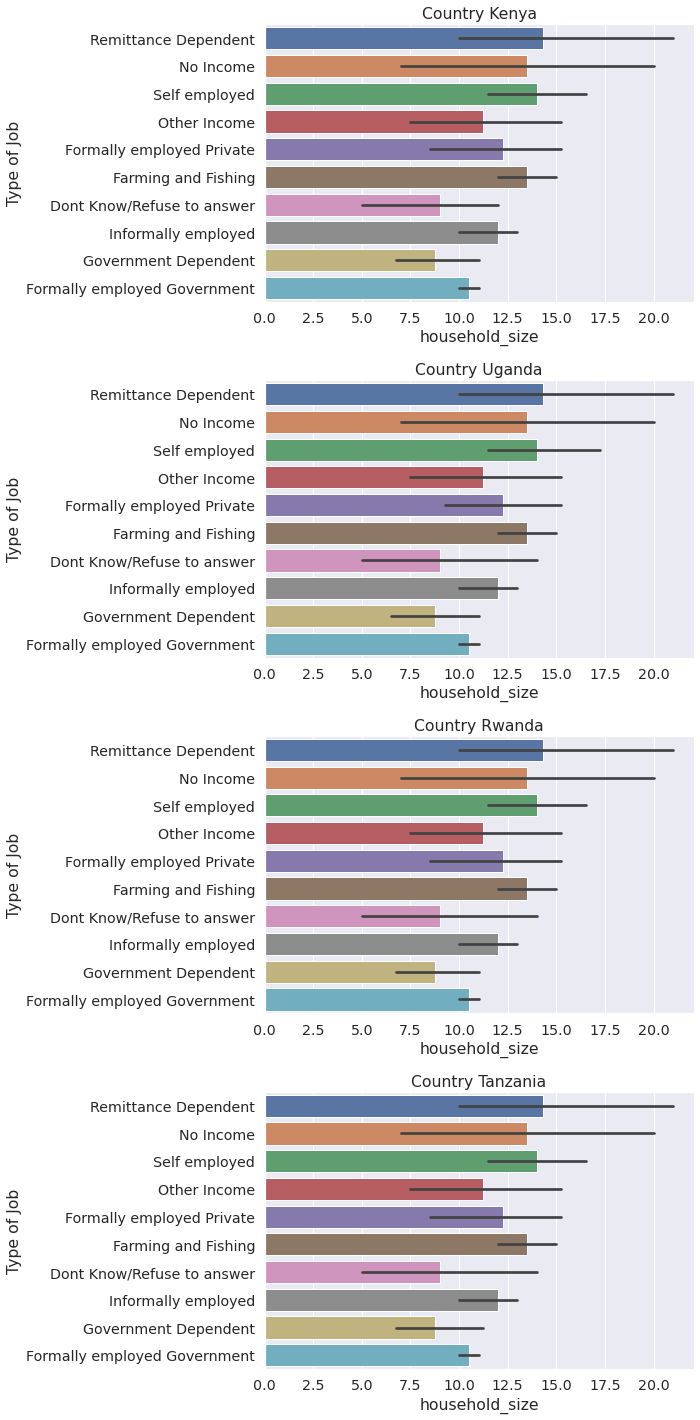

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

for i, c in enumerate(financial['country'].unique()):
  country = financial[financial['country'] == c][:10]
  _ = sns.barplot(x = 'Respondent Age', y = 'Type of Job', data = financial, ax = axes[i])
  _ = axes[i].set_title(f'Country {c}')

plt.tight_layout()

Does a age affect the number of bank?

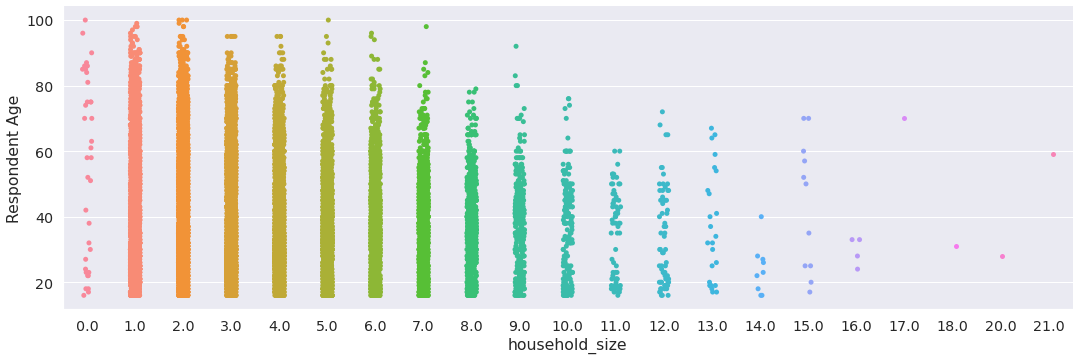

In [ ]:
_ = sns.catplot(x="household_size", y="Respondent Age", data=financial, height=5, aspect=24/8)

## Predicting all instances as majority

In [ ]:
target = financial[Bank]
target.value_counts()

0    20071
1     3297
Name: Has a Bank account, dtype: int64

As we saw above too, 0 is the majority class. Lets begin by predicting everything as 0.

In [ ]:
preds_target = np.zeros(len(financial))

accuracy = accuracy_score(target, preds_target)


print(f'Accuracy score is: {accuracy}')


Accuracy score is: 0.8589096199931531


In [ ]:
preds_test = np.zeros(len(financial))

## Challenging the solution

The dataset provided was not more highly effective more information would be  of great advantage to effectively predict 

# Follow up questions

a). Did we have the right question?

Yes the research question was clearly specified

b). Do we need other data to answer our question?

no the data was correct, although the data more data  feathers would have been more useful

c). Did we have the right data?

yes the data was okay